In [136]:
import pandas as pd
import datetime as dt
import scipy.stats as st

df_final_demo = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_demo.txt')
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [137]:
df_final_demo.isna().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [138]:
df_final_demo[df_final_demo.isnull().any(axis=1)]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
# Drop all the 15 rows with null values
#df_final_demo = df_final_demo.dropna()
df_final_demo = df_final_demo.dropna(subset=["clnt_tenure_yr"]) #if required the row 9583  !!!!!!!!!!!!!!!!!

df_final_demo[df_final_demo.isnull().any(axis=1)]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0


In [140]:
df_final_demo.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [141]:
# Change floats to integers???

df_final_demo = df_final_demo.astype({
    "clnt_tenure_yr": "int",
    "clnt_tenure_mnth": "int",
    #"clnt_age": "int", not possible with null values
    "gendr": "object",
    "num_accts": "int",
    "calls_6_mnth": "int",
    "logons_6_mnth": "int"
})
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60.5,U,2,45105.30,6,9
1,2304905,7,94,58.0,U,2,110860.30,6,9
2,1439522,5,64,32.0,U,2,52467.79,6,9
3,1562045,16,198,49.0,M,2,67454.65,3,6
4,5126305,12,145,33.0,F,2,103671.75,0,3
...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38.5,U,3,1411062.68,5,5
70605,8981690,12,148,31.0,M,2,101867.07,6,6
70606,333913,16,198,61.5,F,2,40745.00,3,3
70607,1573142,21,255,68.0,M,3,475114.69,4,4


In [142]:
# Update with more understandale names
df_final_demo.columns = ["client_id", "client_tenure_years", "client_tenure_months", "client_age", "gender", "num_accounts", "balance", "calls_last_6_months", "logins_last_6_months"]
df_final_demo

,client_id,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_last_6_months,logins_last_6_months
0,836976,6,73,60.5,U,2,45105.30,6,9
1,2304905,7,94,58.0,U,2,110860.30,6,9
2,1439522,5,64,32.0,U,2,52467.79,6,9
3,1562045,16,198,49.0,M,2,67454.65,3,6
4,5126305,12,145,33.0,F,2,103671.75,0,3
...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38.5,U,3,1411062.68,5,5
70605,8981690,12,148,31.0,M,2,101867.07,6,6
70606,333913,16,198,61.5,F,2,40745.00,3,3
70607,1573142,21,255,68.0,M,3,475114.69,4,4


In [143]:
print(df_final_demo.columns)


Index(['client_id', 'client_tenure_years', 'client_tenure_months',
       'client_age', 'gender', 'num_accounts', 'balance',
       'calls_last_6_months', 'logins_last_6_months'],
      dtype='object')


In [274]:
def categorize_age(age):
    if age > 60:
        return "Above 60"
    elif 30 < age <= 60:
        return "Between 30 and 60"
    else:
        return "Below 30"

age_counts = df_final_demo.groupby(df_final_demo["client_age"].apply(categorize_age))["client_id"].count().sort_values(ascending=False)
print(age_counts)

# PENDING CREATE NEW COLUMN WITH THIS age_counts DATA!!!

client_age
Between 30 and 60    41069
Above 60             15501
Below 30             14025
Name: client_id, dtype: int64


<Axes: xlabel='client_age'>

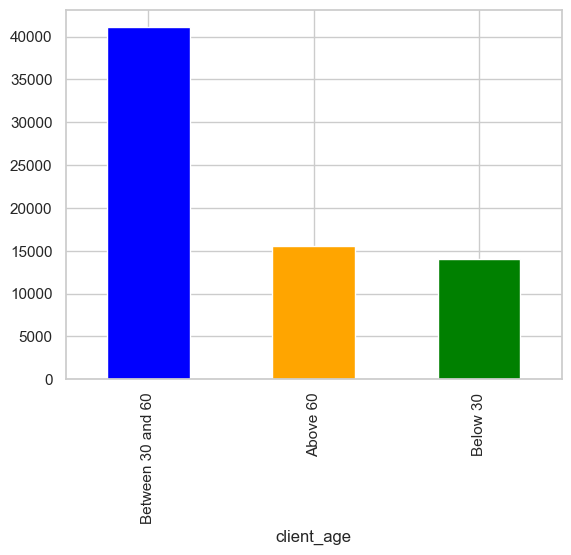

In [275]:
age_counts.plot(kind="bar", color=["blue", "orange", "green"])

In [146]:
df_final_demo["client_tenure_years"].unique()

array([ 6,  7,  5, 16, 12, 30, 15,  8,  4,  3, 10, 11, 13, 14, 19, 18, 25,
       23, 21, 17,  9, 27, 24, 20, 28, 22, 29, 46, 26, 32, 33, 35,  2, 38,
       31, 48, 34, 36, 51, 47, 49, 37, 39, 40, 55, 42, 44, 43, 50, 54, 41,
       45, 52, 62])

In [276]:
def categorize_tenure_years(tenure):
    if tenure > 20:
        return "Above 20"
    elif 10 < tenure <= 20:
        return "Between 10 and 20"
    else:
        return "Below 10"

tenure_counts = df_final_demo.groupby(df_final_demo["client_tenure_years"].apply(categorize_tenure_years))["client_tenure_years"].count().sort_values(ascending=False)
print(tenure_counts)

# PENDING CREATE NEW COLUMN WITH THIS tenure_counts DATA!!!

client_tenure_years
Below 10             34396
Between 10 and 20    26394
Above 20              9805
Name: client_tenure_years, dtype: int64


<Axes: xlabel='client_tenure_years'>

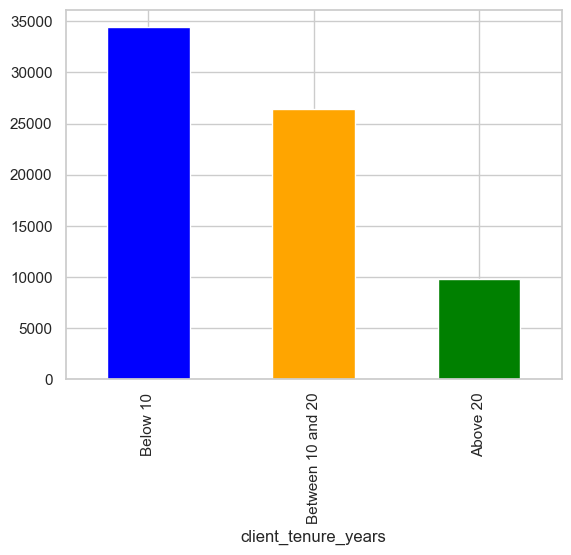

In [ ]:
tenure_counts = df_final_demo.groupby(df_final_demo["client_tenure_years"].apply(categorize_tenure_years))["client_tenure_years"].count().sort_values(ascending=False)
print(tenure_counts)

tenure_counts.plot(kind="bar", color=["blue", "orange", "green"])

In [149]:
df_final_web_1 = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_1.txt')
df_final_web_1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [150]:
df_final_web_1 = df_final_web_1.drop_duplicates()

In [151]:
df_final_web_1[df_final_web_1['client_id'].duplicated()]

,client_id,visitor_id,visit_id,process_step,date_time
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [152]:
df_final_web_1['date_time'] = pd.to_datetime(df_final_web_1['date_time'])

/var/folders/h0/4jpjr28x5yj6tn2nqwlp8cn40000gn/T/ipykernel_8527/1485273086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_web_1['date_time'] = pd.to_datetime(df_final_web_1['date_time'])


In [153]:
df_final_web_1.dtypes

client_id                int64
visitor_id              object
visit_id                object
process_step            object
date_time       datetime64[ns]
dtype: object

In [154]:
df_final_web_2 = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_2.txt')
df_final_web_2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [155]:
df_final_experiment = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt')
df_final_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [156]:
df_final_experiment.isna().sum()

client_id        0
Variation    20109
dtype: int64

In [157]:
df_final_experiment["Variation"].value_counts()

Variation
Test       26968
Control    23532
Name: count, dtype: int64

In [158]:
df_final_experiment["client_id"].duplicated().any()

False

In [159]:
df_final_experiment.dtypes

client_id     int64
Variation    object
dtype: object

In [160]:
df_final_demo_experiment = df_final_demo.merge(df_final_experiment, on = 'client_id', how='left')
df_final_demo_experiment

,client_id,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_last_6_months,logins_last_6_months,Variation
0,836976,6,73,60.5,U,2,45105.30,6,9,Test
1,2304905,7,94,58.0,U,2,110860.30,6,9,Control
2,1439522,5,64,32.0,U,2,52467.79,6,9,Test
3,1562045,16,198,49.0,M,2,67454.65,3,6,Test
4,5126305,12,145,33.0,F,2,103671.75,0,3,Control
...,...,...,...,...,...,...,...,...,...,...
70590,7993686,4,56,38.5,U,3,1411062.68,5,5,NaN
70591,8981690,12,148,31.0,M,2,101867.07,6,6,NaN
70592,333913,16,198,61.5,F,2,40745.00,3,3,NaN
70593,1573142,21,255,68.0,M,3,475114.69,4,4,NaN


In [161]:
df_final_demo_experiment.dropna(subset=["Variation"], inplace=True) 
#dropping null values in Variation because it will not be used in the analysis

In [162]:
df_final_demo_experiment

,client_id,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_last_6_months,logins_last_6_months,Variation
0,836976,6,73,60.5,U,2,45105.30,6,9,Test
1,2304905,7,94,58.0,U,2,110860.30,6,9,Control
2,1439522,5,64,32.0,U,2,52467.79,6,9,Test
3,1562045,16,198,49.0,M,2,67454.65,3,6,Test
4,5126305,12,145,33.0,F,2,103671.75,0,3,Control
...,...,...,...,...,...,...,...,...,...,...
50483,1780858,21,262,68.5,M,3,372100.59,6,9,Test
50484,6967120,21,260,68.5,M,3,4279873.38,6,9,Control
50485,5826160,20,249,56.5,F,2,44837.16,2,5,Test
50486,8739285,19,229,69.5,F,2,44994.24,1,4,Test


In [163]:
df_final_web_2.isnull().sum() # no null values 

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [164]:
df_final_web_2.duplicated().value_counts() # there are 8669 duplicated rows

False    403595
True       8669
Name: count, dtype: int64

In [165]:
df_final_web_2.drop_duplicates(inplace = True) #drop the duplicated values
df_final_web_2.duplicated().value_counts() # confirming no duplicated values

False    403595
Name: count, dtype: int64

In [166]:
df_final_web_2.nunique()

client_id        67430
visitor_id       71042
visit_id         82841
process_step         5
date_time       346697
dtype: int64

In [167]:
#merge df_final_web_2 with df_final_web1
final_web = pd.concat([df_final_web_1, df_final_web_2])
final_web.shape

(744641, 5)

In [168]:
final_web.duplicated().sum()

0

In [169]:
#change format to datetime
final_web['datetime']= pd.to_datetime(final_web['date_time'])
final_web.dtypes

client_id                int64
visitor_id              object
visit_id                object
process_step            object
date_time               object
datetime        datetime64[ns]
dtype: object

In [170]:
#calculate completion rate
val = final_web['process_step'].value_counts() 
display(val)

total_completion_rate = round(val['confirm']/val['start']*100,1)
total_completion_rate

process_step
start      234999
step_1     162797
step_2     132750
step_3     111589
confirm    102506
Name: count, dtype: int64

43.6

In [171]:
final_web

,client_id,visitor_id,visit_id,process_step,date_time,datetime
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17 15:18:04
...,...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,2017-05-24 18:44:34


In [172]:
final_web['client_id'].nunique()

120157

In [173]:
final_web['visitor_id'].nunique()

130236

In [174]:
# Sorting values by datetime of every visit.
final_web = final_web.sort_values(['client_id', 'visit_id', 'datetime'])

In [175]:
final_web.reset_index(drop=True, inplace=True)

In [176]:
final_web

,client_id,visitor_id,visit_id,process_step,date_time,datetime
0,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,2017-04-12 20:19:36
1,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,2017-04-12 20:19:45
2,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,2017-04-12 20:20:31
3,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,2017-04-12 20:22:05
4,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,2017-04-12 20:23:09
...,...,...,...,...,...,...
744636,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08,2017-06-01 22:40:08
744637,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28,2017-06-01 22:41:28
744638,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47,2017-06-01 22:41:47
744639,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58,2017-06-01 22:44:58


In [177]:
#Time spent on each step using the diff() function.
final_web['time_spent']= final_web.groupby(['client_id', 'visit_id'])['datetime'].diff().dt.total_seconds()
final_web

,client_id,visitor_id,visit_id,process_step,date_time,datetime,time_spent
0,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,2017-04-12 20:19:36,NaN
1,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,2017-04-12 20:19:45,9.0
2,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,2017-04-12 20:20:31,46.0
3,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,2017-04-12 20:22:05,94.0
4,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,2017-04-12 20:23:09,64.0
...,...,...,...,...,...,...,...
744636,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08,2017-06-01 22:40:08,7.0
744637,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28,2017-06-01 22:41:28,80.0
744638,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47,2017-06-01 22:41:47,19.0
744639,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58,2017-06-01 22:44:58,191.0


In [178]:
#Grouping by process step
avg_time_each_step = final_web.groupby(['process_step'])['time_spent'].mean()
display(avg_time_each_step)

process_step
confirm    131.109420
start      158.645364
step_1      39.576880
step_2      45.911035
step_3     100.003280
Name: time_spent, dtype: float64

In [179]:
#Creating new column with shift() function, moving 1 row down in every visit_id group
final_web = final_web.sort_values(["visit_id", "datetime"])

final_web["previous_step"] = final_web.groupby('visit_id')['process_step'].shift(1)

#Ordering the steps with numbers
final_web["process_step_number"] = final_web["process_step"].replace({
    "start": 0,
    "step_1": 1,
    "step_2": 2,
    "step_3": 3,
    "confirm": 4
})

final_web.head()

/var/folders/h0/4jpjr28x5yj6tn2nqwlp8cn40000gn/T/ipykernel_8527/223092275.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_web["process_step_number"] = final_web["process_step"].replace({


,client_id,visitor_id,visit_id,process_step,date_time,datetime,time_spent,previous_step,process_step_number
262226,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,2017-04-26 13:22:17,NaN,NaN,4
262227,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,2017-04-26 13:23:09,52.0,confirm,4
674333,9056452,306992881_89423906595,1000165_4190026492_760066,start,2017-06-04 01:07:29,2017-06-04 01:07:29,NaN,NaN,0
674334,9056452,306992881_89423906595,1000165_4190026492_760066,step_1,2017-06-04 01:07:32,2017-06-04 01:07:32,3.0,start,1
674335,9056452,306992881_89423906595,1000165_4190026492_760066,step_2,2017-06-04 01:07:56,2017-06-04 01:07:56,24.0,step_1,2


In [180]:
#Creating a boolean column to check True sum of correct steps values
final_web["error"] = final_web["previous_step"] >= final_web["process_step"]

final_web.head()

,client_id,visitor_id,visit_id,process_step,date_time,datetime,time_spent,previous_step,process_step_number,error
262226,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,2017-04-26 13:22:17,NaN,NaN,4,False
262227,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,2017-04-26 13:23:09,52.0,confirm,4,True
674333,9056452,306992881_89423906595,1000165_4190026492_760066,start,2017-06-04 01:07:29,2017-06-04 01:07:29,NaN,NaN,0,False
674334,9056452,306992881_89423906595,1000165_4190026492_760066,step_1,2017-06-04 01:07:32,2017-06-04 01:07:32,3.0,start,1,False
674335,9056452,306992881_89423906595,1000165_4190026492_760066,step_2,2017-06-04 01:07:56,2017-06-04 01:07:56,24.0,step_1,2,False


In [298]:
#Error rate
final_web["error"].sum()/final_web["error"].count()

0.18950474121086536

In [182]:
df_KPI = final_web.merge(df_final_demo_experiment, on="client_id", how="inner")
df_KPI.head()

,client_id,visitor_id,visit_id,process_step,date_time,datetime,time_spent,previous_step,process_step_number,error,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_last_6_months,logins_last_6_months,Variation
0,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,2017-04-26 13:22:17,NaN,NaN,4,False,4,56,59.5,U,2,63130.44,6,9,Test
1,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,2017-04-26 13:23:09,52.0,confirm,4,True,4,56,59.5,U,2,63130.44,6,9,Test
2,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,2017-04-09 16:20:56,NaN,NaN,0,False,7,88,23.5,M,2,26436.73,6,9,Test
3,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,2017-04-09 16:21:12,16.0,start,1,False,7,88,23.5,M,2,26436.73,6,9,Test
4,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,2017-04-09 16:21:21,9.0,step_1,2,False,7,88,23.5,M,2,26436.73,6,9,Test


In [183]:
df_KPI_test = df_KPI[df_KPI["Variation"] == "Test"]
df_KPI_test.head()

,client_id,visitor_id,visit_id,process_step,date_time,datetime,time_spent,previous_step,process_step_number,error,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_last_6_months,logins_last_6_months,Variation
0,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,2017-04-26 13:22:17,NaN,NaN,4,False,4,56,59.5,U,2,63130.44,6,9,Test
1,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,2017-04-26 13:23:09,52.0,confirm,4,True,4,56,59.5,U,2,63130.44,6,9,Test
2,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,2017-04-09 16:20:56,NaN,NaN,0,False,7,88,23.5,M,2,26436.73,6,9,Test
3,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,2017-04-09 16:21:12,16.0,start,1,False,7,88,23.5,M,2,26436.73,6,9,Test
4,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,2017-04-09 16:21:21,9.0,step_1,2,False,7,88,23.5,M,2,26436.73,6,9,Test


In [184]:
#calculate completion rate for test
val_test = df_KPI_test['process_step'].value_counts() 
display(val_test)

test_completion_rate = round(val_test['confirm']/val_test['start']*100,1)
test_completion_rate

process_step
start      55753
step_1     38651
step_2     30888
step_3     25755
confirm    25594
Name: count, dtype: int64

45.9

In [185]:
#Time Spent on Each Step
df_KPI_test = df_KPI_test.sort_values(["visit_id", "datetime"])

df_KPI_test['time_spent']= df_KPI_test.groupby(['client_id', 'visit_id'])['datetime'].diff().dt.total_seconds()


avg_time_each_step_KPI_test = df_KPI_test.groupby(['process_step'])['time_spent'].mean()

avg_time_each_step_KPI_test

process_step
confirm    129.491196
start      151.698930
step_1      37.816477
step_2      48.276524
step_3      97.356888
Name: time_spent, dtype: float64

In [186]:
#Error Rates
df_KPI_test = df_KPI_test.sort_values(["visit_id", "datetime"])

df_KPI_test["previous_step"] = df_KPI_test.groupby('visit_id')['process_step'].shift(1)

df_KPI_test["error"] = df_KPI_test["previous_step"] >= df_KPI_test["process_step"]

error_test = df_KPI_test["error"].sum()/df_KPI_test["error"].count()

In [187]:
df_KPI_control = df_KPI[df_KPI["Variation"] == "Control"]
df_KPI_control.head()

,client_id,visitor_id,visit_id,process_step,date_time,datetime,time_spent,previous_step,process_step_number,error,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_last_6_months,logins_last_6_months,Variation
18,105007,676020267_36602664238,100030127_47967100085_936361,start,2017-03-22 11:07:49,2017-03-22 11:07:49,NaN,NaN,0,False,9,118,35.0,F,2,34897.47,3,6,Control
19,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:41:51,2017-04-14 16:41:51,NaN,NaN,0,False,16,202,78.0,M,2,146827.14,5,8,Control
20,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:43:16,2017-04-14 16:43:16,85.0,start,0,True,16,202,78.0,M,2,146827.14,5,8,Control
21,5623007,700426174_33289797318,100037962_47432393712_705583,step_1,2017-04-14 16:43:55,2017-04-14 16:43:55,39.0,start,1,False,16,202,78.0,M,2,146827.14,5,8,Control
22,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:44:03,2017-04-14 16:44:03,8.0,step_1,0,True,16,202,78.0,M,2,146827.14,5,8,Control


In [188]:
#calculate completion rate for control
val_control = df_KPI_control['process_step'].value_counts() 
display(val_control)

control_completion_rate = round(val_control['confirm']/val_control['start']*100,1)
control_completion_rate

process_step
start      45366
step_1     29535
step_2     25766
step_3     22497
confirm    17330
Name: count, dtype: int64

38.2

In [189]:
#Time Spent on Each Step
df_KPI_control = df_KPI_control.sort_values(["visit_id", "datetime"])

df_KPI_control['time_spent']= df_KPI_control.groupby(['client_id', 'visit_id'])['datetime'].diff().dt.total_seconds()


avg_time_each_step_KPI_control = df_KPI_control.groupby(['process_step'])['time_spent'].mean()

avg_time_each_step_KPI_control

process_step
confirm    129.964146
start      174.731610
step_1      43.190359
step_2      38.843287
step_3      94.163322
Name: time_spent, dtype: float64

In [190]:
#Error Rates
df_KPI_control = df_KPI_control.sort_values(["visit_id", "datetime"])

df_KPI_control["previous_step"] = df_KPI_control.groupby('visit_id')['process_step'].shift(1)

df_KPI_control["error"] = df_KPI_control["previous_step"] >= df_KPI_control["process_step"]

error_control = df_KPI_control["error"].sum()/df_KPI_control["error"].count()

In [191]:
# calculate error rate - this means that the user in a certain visit had to come a step back in the process
final_web.drop(columns= "error", inplace = True)

In [192]:
# count repeated steps per visit_id
final_web.loc[final_web['visit_id'] == '781255054_21935453173_531117'].value_counts(['process_step'])

process_step
step_2          3
step_3          3
start           1
step_1          1
Name: count, dtype: int64

In [193]:
#sort the values for this visit by datetime
final_web.loc[final_web['visit_id'] == '781255054_21935453173_531117'].sort_values(by = 'datetime')

,client_id,visitor_id,visit_id,process_step,date_time,datetime,time_spent,previous_step,process_step_number
743680,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22,2017-04-17 15:16:22,NaN,NaN,0
743681,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01,2017-04-17 15:17:01,39.0,start,1
743682,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15,2017-04-17 15:17:15,14.0,step_1,2
743683,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17 15:18:04,49.0,step_2,3
743684,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17 15:19:13,69.0,step_3,2
743685,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17 15:19:22,9.0,step_2,3
743686,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17 15:26:51,449.0,step_3,2
743687,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17 15:27:07,16.0,step_2,3


In [194]:
final_web.groupby("visit_id")['process_step'].count().value_counts()
#the number of steps per visit_id

process_step
5     52235
1     25020
2     16976
7     12756
6     12059
4     10569
3      9881
8      5366
9      4612
10     2643
11     1912
12     1258
13      835
14      566
15      398
16      267
17      217
18      118
19      115
20       67
21       63
22       34
23       25
24       23
28       17
25       14
26        8
30        7
31        6
27        5
29        4
35        3
39        3
33        3
32        3
34        2
36        2
42        1
61        1
37        1
Name: count, dtype: int64

### total number of errors and error rate

In [195]:
# create a new column with the previous step for each visit_id
final_web = final_web.sort_values(by=["visit_id", "datetime"])
final_web["previous_step"] = final_web.groupby('visit_id')['process_step'].shift(1)
final_web


,client_id,visitor_id,visit_id,process_step,date_time,datetime,time_spent,previous_step,process_step_number
262226,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,2017-04-26 13:22:17,NaN,NaN,4
262227,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,2017-04-26 13:23:09,52.0,confirm,4
674333,9056452,306992881_89423906595,1000165_4190026492_760066,start,2017-06-04 01:07:29,2017-06-04 01:07:29,NaN,NaN,0
674334,9056452,306992881_89423906595,1000165_4190026492_760066,step_1,2017-06-04 01:07:32,2017-06-04 01:07:32,3.0,start,1
674335,9056452,306992881_89423906595,1000165_4190026492_760066,step_2,2017-06-04 01:07:56,2017-06-04 01:07:56,24.0,step_1,2
...,...,...,...,...,...,...,...,...,...
532198,7149380,483112224_46340533900,999992932_41666455053_671149,step_1,2017-06-06 15:46:24,2017-06-06 15:46:24,21.0,start,1
532199,7149380,483112224_46340533900,999992932_41666455053_671149,step_2,2017-06-06 15:47:32,2017-06-06 15:47:32,68.0,step_1,2
532200,7149380,483112224_46340533900,999992932_41666455053_671149,step_3,2017-06-06 16:01:46,2017-06-06 16:01:46,854.0,step_2,3
532201,7149380,483112224_46340533900,999992932_41666455053_671149,confirm,2017-06-06 16:04:08,2017-06-06 16:04:08,142.0,step_3,4


In [196]:
# calculate error rate - consider moving from a later step to an earlier one as an error
# add columns with step number for each step
final_web["process_step_number"] = final_web["process_step"].replace({
    "start": 0,
    "step_1": 1,
    "step_2": 2,
    "step_3": 3,
    "confirm": 4
})

final_web["previous_step_number"] = final_web["previous_step"].replace({
    "start": 0,
    "step_1": 1,
    "step_2": 2,
    "step_3": 3,
    "confirm": 4
})

/var/folders/h0/4jpjr28x5yj6tn2nqwlp8cn40000gn/T/ipykernel_8527/1160763487.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_web["process_step_number"] = final_web["process_step"].replace({
/var/folders/h0/4jpjr28x5yj6tn2nqwlp8cn40000gn/T/ipykernel_8527/1160763487.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_web["previous_step_number"] = final_web["previous_step"].replace({


In [197]:
# check if the previous step is earlier than the current step - add a column 'error'
# there are some repeated process steps that were also considered as errors. ex: step 1 is the same in process_step and previous_step 
final_web["error"] = final_web["process_step_number"] <= final_web["previous_step_number"]
final_web.head(50)

,client_id,visitor_id,visit_id,process_step,date_time,datetime,time_spent,previous_step,process_step_number,previous_step_number,error
262226,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,2017-04-26 13:22:17,NaN,NaN,4,NaN,False
262227,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,2017-04-26 13:23:09,52.0,confirm,4,4.0,True
674333,9056452,306992881_89423906595,1000165_4190026492_760066,start,2017-06-04 01:07:29,2017-06-04 01:07:29,NaN,NaN,0,NaN,False
674334,9056452,306992881_89423906595,1000165_4190026492_760066,step_1,2017-06-04 01:07:32,2017-06-04 01:07:32,3.0,start,1,0.0,False
674335,9056452,306992881_89423906595,1000165_4190026492_760066,step_2,2017-06-04 01:07:56,2017-06-04 01:07:56,24.0,step_1,2,1.0,False
674336,9056452,306992881_89423906595,1000165_4190026492_760066,step_3,2017-06-04 01:09:13,2017-06-04 01:09:13,77.0,step_2,3,2.0,False
674337,9056452,306992881_89423906595,1000165_4190026492_760066,confirm,2017-06-04 01:09:50,2017-06-04 01:09:50,37.0,step_3,4,3.0,False
546540,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,2017-04-09 16:20:56,NaN,NaN,0,NaN,False
546541,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,2017-04-09 16:21:12,16.0,start,1,0.0,False
546542,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,2017-04-09 16:21:21,9.0,step_1,2,1.0,False


In [198]:
# calculate the total number of errors for the whole dataset
overall_total_errors = final_web['error'].sum()
overall_total_errors


141113

In [199]:
# calculate the error rate for the whole dataset
overall_error_rate = final_web['error'].sum()/final_web['error'].count()*100
overall_error_rate

18.950474121086536

### avg time spent in each step

In [200]:
#calculate the avg time spent in each step
final_web = final_web.sort_values(["visit_id", "datetime"])
final_web['time_spent']= final_web.groupby(['client_id', 'visit_id'])['datetime'].diff().dt.total_seconds()
avg_time_each_step = final_web.groupby(['process_step'])['time_spent'].mean()
avg_time_each_step

process_step
confirm    131.109420
start      158.645364
step_1      39.576880
step_2      45.911035
step_3     100.003280
Name: time_spent, dtype: float64

In [201]:
avg_time_each_step_KPI_test

#Set hypothesis:
# HO: Test average time for each step =< Control average time for each step
# H1: Test average time for each step > Control average time for each step

#significance level = 0.05

st.ttest_ind(avg_time_each_step_KPI_test,avg_time_each_step_KPI_control, equal_var=False, alternative= "less")

TtestResult(statistic=-0.09533091588623961, pvalue=0.4632253738836483, df=7.815805039950769)

In [202]:
#Set hypothesis:
# HO: Test completion rate => control completion overall_error_rate
# H1: Test completion rate < control completion overall_error_rate

#significance level = 0.05

st.ttest_ind(test_completion_rate,control_completion_rate, equal_var=False, alternative = "greater")

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


TtestResult(statistic=nan, pvalue=nan, df=1.0)

In [203]:
improvement_rate = (test_completion_rate/control_completion_rate) - 1
improvement_rate

0.20157068062827221

In [204]:
df_final_experiment.dropna(inplace=True)


In [205]:
df_step_2 = final_web[final_web["process_step"]=="step_2"][["time_spent", "client_id"]]
df_step_2.dropna(inplace=True)

df_step_3 = final_web[final_web["process_step"]=="step_3"][["time_spent", "client_id"]]
df_step_3.dropna(inplace=True)

df_start = final_web[final_web["process_step"]=="start"][["time_spent", "client_id"]]
df_start.dropna(inplace=True)

df_step_1 = final_web[final_web["process_step"]=="step_1"][["time_spent", "client_id"]]
df_step_1.dropna(inplace=True)

df_confirm = final_web[final_web["process_step"]=="confirm"][["time_spent", "client_id"]]
df_confirm.dropna(inplace=True)

In [206]:
df_confirm_merged = df_confirm.merge(df_final_experiment, on="client_id", how="inner")
df_step_2_merged = df_step_2.merge(df_final_experiment, on="client_id", how="inner")
df_step_3_merged = df_step_3.merge(df_final_experiment, on="client_id", how="inner")
df_step_1_merged = df_step_1.merge(df_final_experiment, on="client_id", how="inner")
df_start_merged = df_start.merge(df_final_experiment, on="client_id", how="inner")


In [207]:
df_confirm_merged_test = df_confirm_merged[df_confirm_merged['Variation']=='Test']
df_confirm_merged_contol = df_confirm_merged[df_confirm_merged['Variation']=='Control']

df_step_2_merged_test = df_step_2_merged[df_step_2_merged['Variation']=='Test']
df_step_2_merged_contol = df_step_2_merged[df_step_2_merged['Variation']=='Control']

df_step_3_merged_test = df_step_3_merged[df_step_3_merged['Variation']=='Test']
df_step_3_merged_contol = df_step_3_merged[df_step_3_merged['Variation']=='Control']

df_step_1_merged_test = df_step_1_merged[df_step_1_merged['Variation']=='Test']
df_step_1_merged_contol = df_step_1_merged[df_step_1_merged['Variation']=='Control']

df_start_merged_test = df_start_merged[df_start_merged['Variation']=='Test']
df_start_merged_contol = df_start_merged[df_start_merged['Variation']=='Control']



In [301]:
#Set hypothesis:
# HO: Test average time for confirm step =< Control average time for confirm step
# H1: Test average time for confirm step > Control average time for confirm step

#significance level = 0.05

st.ttest_ind(df_confirm_merged_test["time_spent"],df_confirm_merged_contol["time_spent"], equal_var=False, alternative= "greater")

TtestResult(statistic=-0.2255298627452412, pvalue=0.5892158561618154, df=38693.85126544269)

In [302]:
#Set hypothesis:
# HO: Test average time for step_1 =< Control average time for step_1 
# H1: Test average time for step_1 > Control average time for step_1 

#significance level = 0.05

st.ttest_ind(df_step_1_merged_test["time_spent"],df_step_1_merged_contol["time_spent"], equal_var=False, alternative= "greater")

TtestResult(statistic=-6.923714817736714, pvalue=0.9999999999977796, df=63761.76800297023)

In [303]:
#Set hypothesis:
# HO: Test average time for step_2 =< Control average time for step_2 
# H1: Test average time for step_2 > Control average time for step_2 

#significance level = 0.05

st.ttest_ind(df_step_2_merged_test["time_spent"],df_step_2_merged_contol["time_spent"], equal_var=False, alternative= "greater")

TtestResult(statistic=13.351901820594218, pvalue=6.696250332545127e-41, df=54046.064467386954)

In [304]:
#Set hypothesis:
# HO: Test average time for step_3 =< Control average time for step_3 
# H1: Test average time for step_3 > Control average time for step_3 

#significance level = 0.05

st.ttest_ind(df_step_3_merged_test["time_spent"],df_step_3_merged_contol["time_spent"], equal_var=False, alternative= "greater")

TtestResult(statistic=2.904492522973145, pvalue=0.0018400889632858586, df=47702.49252048633)

In [305]:
#Set hypothesis:
# HO: Test average time for start step =< Control average time for start step
# H1: Test average time for start step > Control average time for start step

#significance level = 0.05

st.ttest_ind(df_start_merged_test["time_spent"],df_start_merged_contol["time_spent"], equal_var=False, alternative= "greater")

TtestResult(statistic=-4.554169441002908, pvalue=0.9999973567454508, df=22798.102661976067)

In [213]:
final_web

,client_id,visitor_id,visit_id,process_step,date_time,datetime,time_spent,previous_step,process_step_number,previous_step_number,error
262226,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,2017-04-26 13:22:17,NaN,NaN,4,NaN,False
262227,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,2017-04-26 13:23:09,52.0,confirm,4,4.0,True
674333,9056452,306992881_89423906595,1000165_4190026492_760066,start,2017-06-04 01:07:29,2017-06-04 01:07:29,NaN,NaN,0,NaN,False
674334,9056452,306992881_89423906595,1000165_4190026492_760066,step_1,2017-06-04 01:07:32,2017-06-04 01:07:32,3.0,start,1,0.0,False
674335,9056452,306992881_89423906595,1000165_4190026492_760066,step_2,2017-06-04 01:07:56,2017-06-04 01:07:56,24.0,step_1,2,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...
532198,7149380,483112224_46340533900,999992932_41666455053_671149,step_1,2017-06-06 15:46:24,2017-06-06 15:46:24,21.0,start,1,0.0,False
532199,7149380,483112224_46340533900,999992932_41666455053_671149,step_2,2017-06-06 15:47:32,2017-06-06 15:47:32,68.0,step_1,2,1.0,False
532200,7149380,483112224_46340533900,999992932_41666455053_671149,step_3,2017-06-06 16:01:46,2017-06-06 16:01:46,854.0,step_2,3,2.0,False
532201,7149380,483112224_46340533900,999992932_41666455053_671149,confirm,2017-06-06 16:04:08,2017-06-06 16:04:08,142.0,step_3,4,3.0,False


In [214]:
# Other Hypothesis Examples: ¿¿Age??

In [215]:
#Was the experiment well-structured?

#Were clients randomly and equally divided between the old and new designs?

#Were there any biases?

In [216]:
df_final_demo_experiment

,client_id,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_last_6_months,logins_last_6_months,Variation
0,836976,6,73,60.5,U,2,45105.30,6,9,Test
1,2304905,7,94,58.0,U,2,110860.30,6,9,Control
2,1439522,5,64,32.0,U,2,52467.79,6,9,Test
3,1562045,16,198,49.0,M,2,67454.65,3,6,Test
4,5126305,12,145,33.0,F,2,103671.75,0,3,Control
...,...,...,...,...,...,...,...,...,...,...
50483,1780858,21,262,68.5,M,3,372100.59,6,9,Test
50484,6967120,21,260,68.5,M,3,4279873.38,6,9,Control
50485,5826160,20,249,56.5,F,2,44837.16,2,5,Test
50486,8739285,19,229,69.5,F,2,44994.24,1,4,Test


In [217]:
#Was the experiment well-structured? Were clients randomly and equally divided between the old and new designs? Were there any biases?

In [218]:
client_test_count = df_final_demo_experiment[df_final_demo_experiment['Variation']=='Test']['client_id'].nunique()
client_test_count
#26961

26961

In [219]:
client_control_count = df_final_demo_experiment[df_final_demo_experiment['Variation']=='Control']['client_id'].nunique()
client_difference = client_test_count - client_control_count
client_difference
#there is a difference of 3434 between customers testing the experiment with the amount of customers keeping the original control test
#26961 test  - 23527 control = 3434

3434

In [220]:
client_test = df_final_demo_experiment[df_final_demo_experiment['Variation']=='Test']
client_control = df_final_demo_experiment[df_final_demo_experiment['Variation']=='Control']

In [221]:
client_test['client_tenure_years'].describe()

count    26961.000000
mean        11.982901
std          6.844947
min          2.000000
25%          6.000000
50%         11.000000
75%         15.000000
max         55.000000
Name: client_tenure_years, dtype: float64

In [222]:
client_control['client_tenure_years'].describe()

count    23527.000000
mean        12.087686
std          6.877531
min          2.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         55.000000
Name: client_tenure_years, dtype: float64

In [223]:
client_test

,client_id,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_last_6_months,logins_last_6_months,Variation
0,836976,6,73,60.5,U,2,45105.30,6,9,Test
2,1439522,5,64,32.0,U,2,52467.79,6,9,Test
3,1562045,16,198,49.0,M,2,67454.65,3,6,Test
7,388801,30,361,57.5,M,5,522498.72,1,4,Test
9,8198645,15,189,54.5,F,2,382303.83,6,9,Test
...,...,...,...,...,...,...,...,...,...,...
50480,501496,23,281,35.0,F,2,32529.34,0,3,Test
50483,1780858,21,262,68.5,M,3,372100.59,6,9,Test
50485,5826160,20,249,56.5,F,2,44837.16,2,5,Test
50486,8739285,19,229,69.5,F,2,44994.24,1,4,Test


In [224]:
client_test['client_age'].describe()

count    26961.000000
mean        47.163922
std         15.514461
min         17.000000
25%         33.500000
50%         47.500000
75%         59.500000
max         96.000000
Name: client_age, dtype: float64

In [225]:
client_control['client_age'].describe()

count    23526.000000
mean        47.498427
std         15.521781
min         17.000000
25%         33.500000
50%         48.500000
75%         60.000000
max         96.000000
Name: client_age, dtype: float64

In [226]:
client_test['gender'].value_counts()

gender
U    9266
M    8977
F    8716
X       2
Name: count, dtype: int64

In [227]:
client_control['gender'].value_counts()

gender
U    8014
M    7970
F    7543
Name: count, dtype: int64

In [228]:
final_web

,client_id,visitor_id,visit_id,process_step,date_time,datetime,time_spent,previous_step,process_step_number,previous_step_number,error
262226,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,2017-04-26 13:22:17,NaN,NaN,4,NaN,False
262227,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,2017-04-26 13:23:09,52.0,confirm,4,4.0,True
674333,9056452,306992881_89423906595,1000165_4190026492_760066,start,2017-06-04 01:07:29,2017-06-04 01:07:29,NaN,NaN,0,NaN,False
674334,9056452,306992881_89423906595,1000165_4190026492_760066,step_1,2017-06-04 01:07:32,2017-06-04 01:07:32,3.0,start,1,0.0,False
674335,9056452,306992881_89423906595,1000165_4190026492_760066,step_2,2017-06-04 01:07:56,2017-06-04 01:07:56,24.0,step_1,2,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...
532198,7149380,483112224_46340533900,999992932_41666455053_671149,step_1,2017-06-06 15:46:24,2017-06-06 15:46:24,21.0,start,1,0.0,False
532199,7149380,483112224_46340533900,999992932_41666455053_671149,step_2,2017-06-06 15:47:32,2017-06-06 15:47:32,68.0,step_1,2,1.0,False
532200,7149380,483112224_46340533900,999992932_41666455053_671149,step_3,2017-06-06 16:01:46,2017-06-06 16:01:46,854.0,step_2,3,2.0,False
532201,7149380,483112224_46340533900,999992932_41666455053_671149,confirm,2017-06-06 16:04:08,2017-06-06 16:04:08,142.0,step_3,4,3.0,False


In [229]:
df_final_demo

,client_id,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_last_6_months,logins_last_6_months
0,836976,6,73,60.5,U,2,45105.30,6,9
1,2304905,7,94,58.0,U,2,110860.30,6,9
2,1439522,5,64,32.0,U,2,52467.79,6,9
3,1562045,16,198,49.0,M,2,67454.65,3,6
4,5126305,12,145,33.0,F,2,103671.75,0,3
...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38.5,U,3,1411062.68,5,5
70605,8981690,12,148,31.0,M,2,101867.07,6,6
70606,333913,16,198,61.5,F,2,40745.00,3,3
70607,1573142,21,255,68.0,M,3,475114.69,4,4


In [230]:
#Tableu 
#0. number of errors
#1. completion rate for test and control
#2. time spent on each step for both variations
#3 Age groups of customers
#4. Tenure groups of customers
#5. some sets of data for customers split such as gender, age, tenure

In [231]:
df_final_demo_experiment

,client_id,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_last_6_months,logins_last_6_months,Variation
0,836976,6,73,60.5,U,2,45105.30,6,9,Test
1,2304905,7,94,58.0,U,2,110860.30,6,9,Control
2,1439522,5,64,32.0,U,2,52467.79,6,9,Test
3,1562045,16,198,49.0,M,2,67454.65,3,6,Test
4,5126305,12,145,33.0,F,2,103671.75,0,3,Control
...,...,...,...,...,...,...,...,...,...,...
50483,1780858,21,262,68.5,M,3,372100.59,6,9,Test
50484,6967120,21,260,68.5,M,3,4279873.38,6,9,Control
50485,5826160,20,249,56.5,F,2,44837.16,2,5,Test
50486,8739285,19,229,69.5,F,2,44994.24,1,4,Test


In [232]:
avg_total_time_test = avg_time_each_step_KPI_test.sum().round(2)
avg_total_time_control = avg_time_each_step_KPI_control.sum().round(2)

In [306]:
avg_time_each_step_KPI_test.sum()

464.6400145066704

In [307]:
avg_time_each_step_KPI_control.sum()

480.89272313670523

In [309]:
avg_time_each_step_KPI_control.sum() - avg_time_each_step_KPI_test.sum()

16.252708630034817

In [235]:
general_metrics = pd.DataFrame([
    {"variant": "test", "metric": "completion_rate", "value": test_completion_rate},
    {"variant": "control", "metric": "completion_rate", "value": control_completion_rate},
    {"variant": "test", "metric": "avg_total_time_test", "value": avg_total_time_test},
    {"variant": "control", "metric": "avg_total_time_control", "value": avg_total_time_control},
    {"variant": "test", "metric": "error", "value": error_test},
    {"variant": "control", "metric": "error", "value": error_control},
    {"variant": "control", "metric": "start", "value": avg_time_each_step_KPI_control['start']},
    {"variant": "control", "metric": "step_1", "value": avg_time_each_step_KPI_control['step_1']},
    {"variant": "control", "metric": "step_2", "value": avg_time_each_step_KPI_control['step_2']},
    {"variant": "control", "metric": "step_3", "value": avg_time_each_step_KPI_control['step_3']},
    {"variant": "control", "metric": "confirm", "value": avg_time_each_step_KPI_control['confirm']},
    {"variant": "test", "metric": "start", "value": avg_time_each_step_KPI_test['start']},
    {"variant": "test", "metric": "step_1", "value": avg_time_each_step_KPI_test['step_1']},
    {"variant": "test", "metric": "step_2", "value": avg_time_each_step_KPI_test['step_2']},
    {"variant": "test", "metric": "step_3", "value": avg_time_each_step_KPI_test['step_3']},
    {"variant": "test", "metric": "confirm", "value": avg_time_each_step_KPI_test['confirm']}
])

In [236]:
general_metrics.to_csv("general_metrics.csv", index=False)

In [237]:
final_web.to_csv("final_web.csv", index=False)

In [238]:
df_final_demo_experiment.to_csv("df_final_demo_experiment.csv", index=False)

In [239]:
df_final_demo_experiment

,client_id,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_last_6_months,logins_last_6_months,Variation
0,836976,6,73,60.5,U,2,45105.30,6,9,Test
1,2304905,7,94,58.0,U,2,110860.30,6,9,Control
2,1439522,5,64,32.0,U,2,52467.79,6,9,Test
3,1562045,16,198,49.0,M,2,67454.65,3,6,Test
4,5126305,12,145,33.0,F,2,103671.75,0,3,Control
...,...,...,...,...,...,...,...,...,...,...
50483,1780858,21,262,68.5,M,3,372100.59,6,9,Test
50484,6967120,21,260,68.5,M,3,4279873.38,6,9,Control
50485,5826160,20,249,56.5,F,2,44837.16,2,5,Test
50486,8739285,19,229,69.5,F,2,44994.24,1,4,Test


In [240]:
general_metrics

,variant,metric,value
0,test,completion_rate,45.900000
1,control,completion_rate,38.200000
2,test,avg_total_time_test,464.640000
3,control,avg_total_time_control,480.890000
4,test,error,0.302121
5,control,error,0.269770
6,control,start,174.731610
7,control,step_1,43.190359
8,control,step_2,38.843287
9,control,step_3,94.163322


In [241]:
general_metrics.rename(columns={'variant': 'Variation'}, inplace=True)

In [242]:
general_metrics.to_csv("general_metrics.csv", index=False)

In [243]:
general_metrics

,Variation,metric,value
0,test,completion_rate,45.900000
1,control,completion_rate,38.200000
2,test,avg_total_time_test,464.640000
3,control,avg_total_time_control,480.890000
4,test,error,0.302121
5,control,error,0.269770
6,control,start,174.731610
7,control,step_1,43.190359
8,control,step_2,38.843287
9,control,step_3,94.163322


In [244]:
df_final_demo_experiment

,client_id,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_last_6_months,logins_last_6_months,Variation
0,836976,6,73,60.5,U,2,45105.30,6,9,Test
1,2304905,7,94,58.0,U,2,110860.30,6,9,Control
2,1439522,5,64,32.0,U,2,52467.79,6,9,Test
3,1562045,16,198,49.0,M,2,67454.65,3,6,Test
4,5126305,12,145,33.0,F,2,103671.75,0,3,Control
...,...,...,...,...,...,...,...,...,...,...
50483,1780858,21,262,68.5,M,3,372100.59,6,9,Test
50484,6967120,21,260,68.5,M,3,4279873.38,6,9,Control
50485,5826160,20,249,56.5,F,2,44837.16,2,5,Test
50486,8739285,19,229,69.5,F,2,44994.24,1,4,Test


In [245]:
df_final_demo_experiment.drop(df_final_demo_experiment[df_final_demo_experiment['client_tenure_years']+18 >= df_final_demo_experiment['client_age']].index, inplace=True)

In [246]:
df_final_demo_experiment.reset_index(drop=True, inplace=True)

In [247]:
df_final_demo_experiment.to_csv("df_final_demo_experiment.csv", index=False)

In [248]:
df_final_demo_experiment['gender'].value_counts()

gender
U    15458
M    14811
F    14597
X        1
Name: count, dtype: int64

In [249]:
df_final_demo_experiment.drop(df_final_demo_experiment[df_final_demo_experiment['gender']=='X'].index, inplace=True)

In [250]:
df_final_demo_experiment

,client_id,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_last_6_months,logins_last_6_months,Variation
0,836976,6,73,60.5,U,2,45105.30,6,9,Test
1,2304905,7,94,58.0,U,2,110860.30,6,9,Control
2,1439522,5,64,32.0,U,2,52467.79,6,9,Test
3,1562045,16,198,49.0,M,2,67454.65,3,6,Test
4,5126305,12,145,33.0,F,2,103671.75,0,3,Control
...,...,...,...,...,...,...,...,...,...,...
44862,1780858,21,262,68.5,M,3,372100.59,6,9,Test
44863,6967120,21,260,68.5,M,3,4279873.38,6,9,Control
44864,5826160,20,249,56.5,F,2,44837.16,2,5,Test
44865,8739285,19,229,69.5,F,2,44994.24,1,4,Test


In [251]:
jaja = df_final_demo_experiment.drop(df_final_demo_experiment[df_final_demo_experiment['gender']=='U'].index)

In [ ]:
jaja['gender'].value_counts() 

gender
M    14811
F    14597
Name: count, dtype: int64

[Text(0, 0, 'M'), Text(1, 0, 'F')]

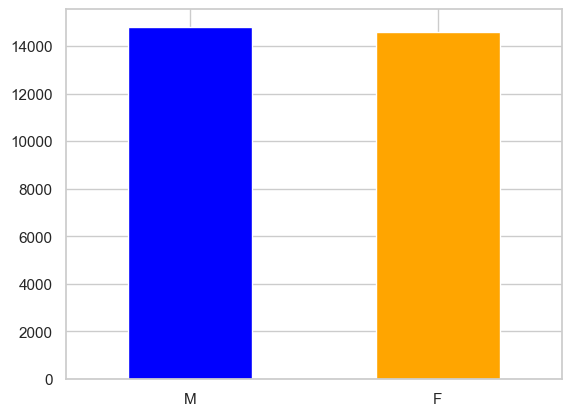

In [297]:
ax = gender_counts.plot(kind="bar", color=["blue", "orange", "green"])
ax.set_xticklabels(gender_counts.index, rotation=360)

In [261]:
mean_balance_by_group = df_final_demo_experiment.groupby('Variation')['balance'].mean().round(2).reset_index()

print(mean_balance_by_group)

  Variation    balance
0   Control  158410.39
1      Test  157765.82


/var/folders/h0/4jpjr28x5yj6tn2nqwlp8cn40000gn/T/ipykernel_8527/2318040069.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_balance_by_group, x='Variation', y='balance', palette="Set2", width=0.3)


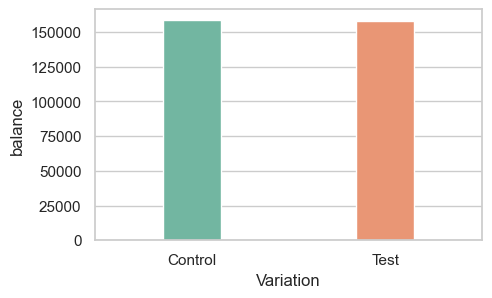

In [287]:
sns.set(style="whitegrid")

plt.figure(figsize=(5, 3))
sns.barplot(data=mean_balance_by_group, x='Variation', y='balance', palette="Set2", width=0.3)

plt.show()

In [270]:
mean_logins_by_group = df_final_demo_experiment.groupby('Variation')['logins_last_6_months'].mean().round(2).reset_index()


/var/folders/h0/4jpjr28x5yj6tn2nqwlp8cn40000gn/T/ipykernel_8527/295115678.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_logins_by_group, x='Variation', y='logins_last_6_months', palette="Set2", width=0.3)


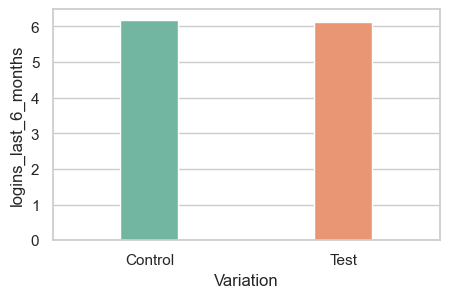

In [288]:
sns.set(style="whitegrid")

plt.figure(figsize=(5, 3))
sns.barplot(data=mean_logins_by_group, x='Variation', y='logins_last_6_months', palette="Set2", width=0.3)
plt.show()

In [281]:
mean_number_of_accounts_by_group = df_final_demo_experiment.groupby('Variation')['num_accounts'].mean().round(2).reset_index()

In [282]:
mean_number_of_accounts_by_group

,Variation,num_accounts
0,Control,2.25
1,Test,2.24


/var/folders/h0/4jpjr28x5yj6tn2nqwlp8cn40000gn/T/ipykernel_8527/3577839632.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_number_of_accounts_by_group, x='Variation', y='num_accounts', palette="Set2", width=0.3)


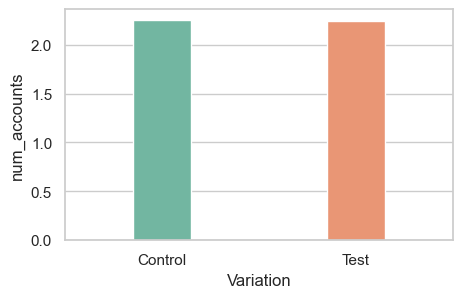

In [286]:
plt.figure(figsize=(5, 3))
sns.barplot(data=mean_number_of_accounts_by_group, x='Variation', y='num_accounts', palette="Set2", width=0.3)
plt.show()